In [2]:
import gala.potential as gp
import astropy.units as u
import numpy as np
import gala.dynamics as gd
from gala.units import galactic
import matplotlib.pyplot as plt

In [3]:
total_potential = gp.CCompositePotential()
total_potential['disk'] = gp.MiyamotoNagaiPotential(m = 1E11 , a=3, b=0.15, units=galactic)
total_potential['bulge'] = gp.HernquistPotential(m = 3E9 , c = 0.67, units=galactic)
total_potential['dm_halo'] = gp.NFWPotential.from_circular_velocity(v_c=200*u.km/u.s,
                                             r_s=10.*u.kpc,
                                             units=galactic)
total_potential['dm_halo_triaxial'] = gp.NFWPotential(m=5E12,r_s=80, a=2, b=3, c=7, units=galactic)
#total_potential['nucleus'] = gp.KeplerPotential(m=)

In [4]:
test_star_p = [18,0,0]
test_star_v = [20,175,50]

In [8]:
ics = gd.PhaseSpacePosition(pos = test_star_p*u.kpc, 
                            vel = test_star_v*u.km/u.s)
#orbital matematical derivation
orbit = gp.Hamiltonian(total_potential['dm_halo']).integrate_orbit(ics, dt=0.5*u.Myr , t1=0, t2=10*u.Gyr)
orbit_triaxial = gp.Hamiltonian(total_potential['dm_halo_triaxial']).integrate_orbit(ics, dt=0.5*u.Myr, t1=0, t2=10*u.Gyr)
orbit_total = gp.Hamiltonian(total_potential).integrate_orbit(ics, dt=.5*u.Myr, t1=0, t2=10*u.Gyr)
#some random initial conditions sampling a gaussion over the orbit 
#100 pc en x, y, z and 1 km/s in velocity variation
n_orbits = 500

new_pos = np.random.normal(ics.pos.xyz.to(u.pc).value, 100,
                           size=(n_orbits,3)).T*u.pc


new_vel = np.random.normal(ics.vel.d_xyz.to(u.km/u.s).value, 1.,
                           size=(n_orbits,3)).T * u.km/u.s

new_ics = gd.PhaseSpacePosition(pos=new_pos, vel=new_vel)
orbits = gp.Hamiltonian(total_potential['dm_halo']).integrate_orbit(new_ics,  dt=0.5*u.Myr , t1=0, t2=10*u.Gyr)
orbits_t = gp.Hamiltonian(total_potential['dm_halo_triaxial']).integrate_orbit(new_ics, dt=0.5*u.Myr, t1=0, t2=10*u.Gyr)

orbits_total = gp.Hamiltonian(total_potential).integrate_orbit(new_ics, dt=.5*u.Myr, t1=0, t2=10*u.Gyr)

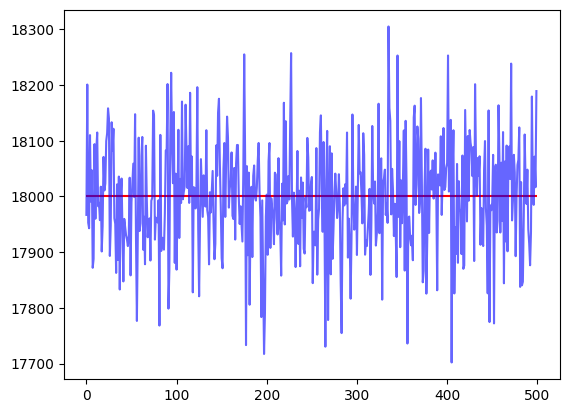

In [9]:
#posiciones respecto al inicio de las randoms
plt.hlines(y=18000, xmin=0, xmax=500, color='red')
plt.plot(np.arange(0,500), new_pos[0], alpha=0.6, color='blue')

ValueError: x and y must have same first dimension, but have shapes (20000,) and (1,)

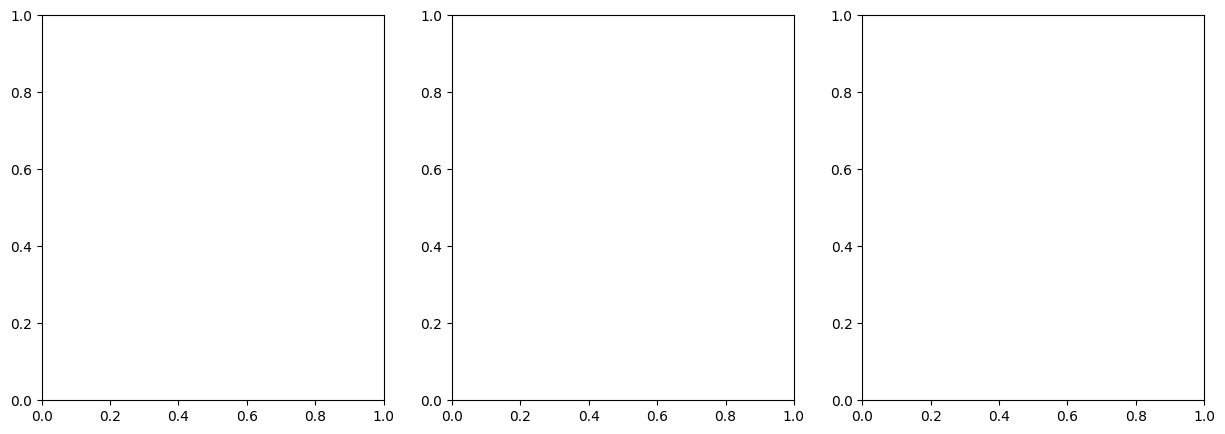

In [16]:
#posiciones de las particulas en distintos potenciales
fig, ax = plt.subplots(1,3,figsize=(15,5))
#diff1 = orbits.x - orbit.pos.x[:, np.newaxis]

std1s = []
for i in range(len(orbits.t)):
    diff1 = orbits.x - orbit.pos.x[i, np.newaxis]
    std1 = np.std(diff1)
    std1s.append(std1)
"""

diff2 = orbits_t.x - orbit_triaxial.pos.x[:, np.newaxis]
std2 = np.std(diff2)

diff3 = orbits_total.x - orbit_total.pos.x[:, np.newaxis]
std3 = np.std(diff3)
"""
ax[0].plot(orbits.t, std1, alpha=0.6, color='blue')
ax[1].plot(orbits_t.t, std2, alpha=0.7, color='red')
ax[2].plot(orbits_total.t, std3, alpha=0.8, color='green')

In [12]:
std1

<Quantity 4.90947874 kpc>

In [72]:
orbit.pos

<CartesianRepresentation (x, y, z) in kpc
    [(18.        ,  0.        , 0.        ),
     (18.00990391,  0.08948731, 0.0255678 ),
     (18.01916174,  0.17897142, 0.05113469), ...,
     (-5.4940689 , 16.78759434, 4.79645553),
     (-5.58140473, 16.76127266, 4.78893505),
     (-5.66854651, 16.73436822, 4.78124806)]>

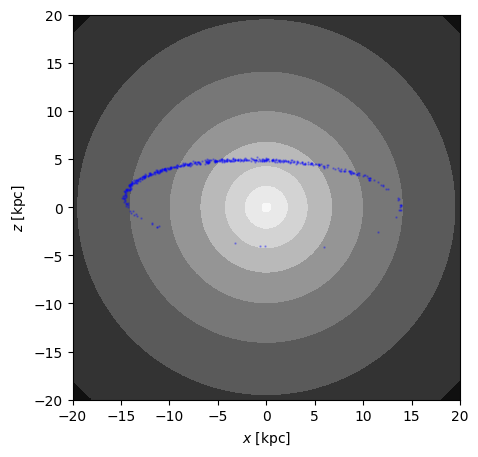

In [37]:
grid = np.linspace(-20,20,64)
fig, ax = plt.subplots(1, 1, figsize=(5,5))
fig = total_potential['dm_halo'].plot_contours(grid=(grid, 0, grid), cmap='Greys', ax=ax)
fig = orbits[-1].plot(['x','z'], color='blue', s=2,  
                      alpha=0.3, axes=[ax], auto_aspect=False)



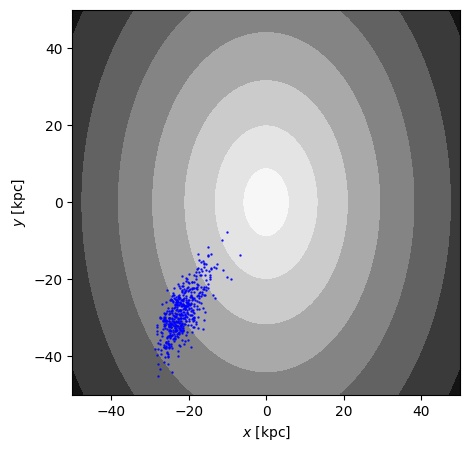

In [38]:
grid = np.linspace(-50,50,64)
fig, ax = plt.subplots(1, 1, figsize=(5,5))
fig = total_potential['dm_halo_triaxial'].plot_contours(grid=(grid, grid, 0), cmap='Greys', ax=ax)
fig = orbits_t[-1].plot(['x','y'], color='blue', s=2,  
                      alpha=0.9, axes=[ax], auto_aspect=False)

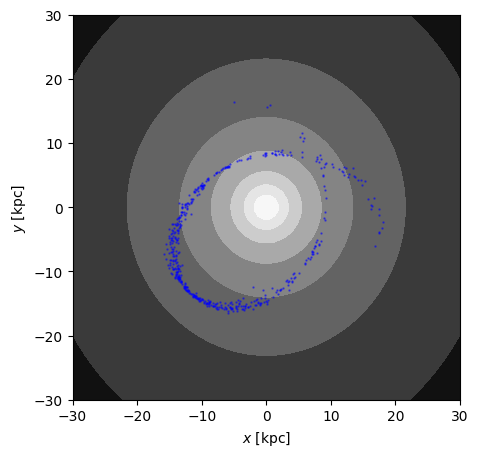

In [39]:
grid = np.linspace(-30,30,64)
fig, ax = plt.subplots(1, 1, figsize=(5,5))
fig = total_potential.plot_contours(grid=(grid, grid, 0), cmap='Greys', ax=ax)
fig = orbit_total[-1].plot(['x','y'], color='blue', s=2,  
                      alpha=0.5, axes=[ax], auto_aspect=False)